In [77]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Explanatory Data Analysis (EDA)

In [78]:
data_frame = pd.read_csv('../assets/data/raw_analyst_ratings.csv')
data_frame.head(20)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


55987


In [79]:
# Drop the first column (Unnamed: 0)
data_frame.drop('Unnamed: 0',axis=1,inplace=True)
# Print Info about the data_frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [80]:

# Check if there is a missing data
data_frame.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [81]:
# Calculate the length of each headline and store it in a new column 'headline_length'
data_frame['headline_length'] = data_frame['headline'].apply(len)

# Display the first few rows to verify the new column
print(data_frame[['headline', 'headline_length']].head())

                                            headline  headline_length
0            Stocks That Hit 52-Week Highs On Friday               39
1         Stocks That Hit 52-Week Highs On Wednesday               42
2                      71 Biggest Movers From Friday               29
3       46 Stocks Moving In Friday's Mid-Day Session               44
4  B of A Securities Maintains Neutral on Agilent...               87


In [82]:
# Perform descriptive statistics on the 'headline_length' column
headline_length_stats = data_frame['headline_length'].describe().T

headline_length_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [83]:
# Count the number of articles per publisher
publisher_counts = data_frame['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


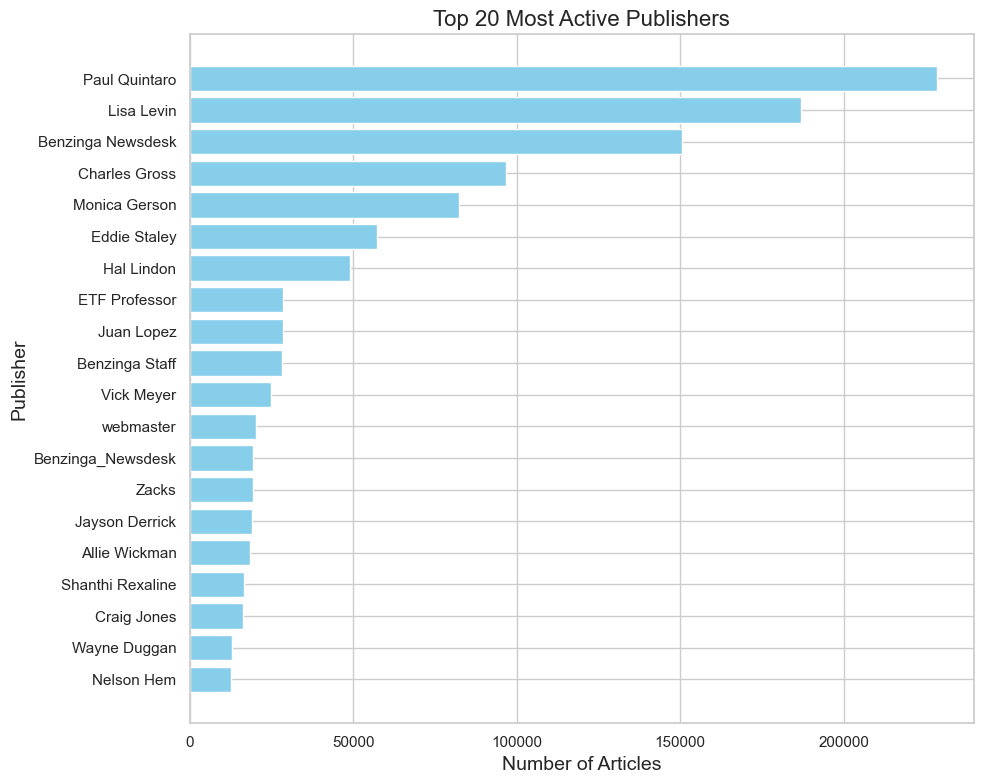

In [84]:
# Visualize the top publishers
# Plot the top 20 publishers using a horizontal bar chart
top_publishers = publisher_counts.head(20)
plt.figure(figsize=(10, 8))  # Adjust the figure size
plt.barh(top_publishers.index, top_publishers.values, color='skyblue')  # Horizontal bar chart
plt.title('Top 20 Most Active Publishers', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis so the top publisher appears at the top
plt.tight_layout()
plt.show()


C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_6604\891057392.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce', infer_datetime_format=True)


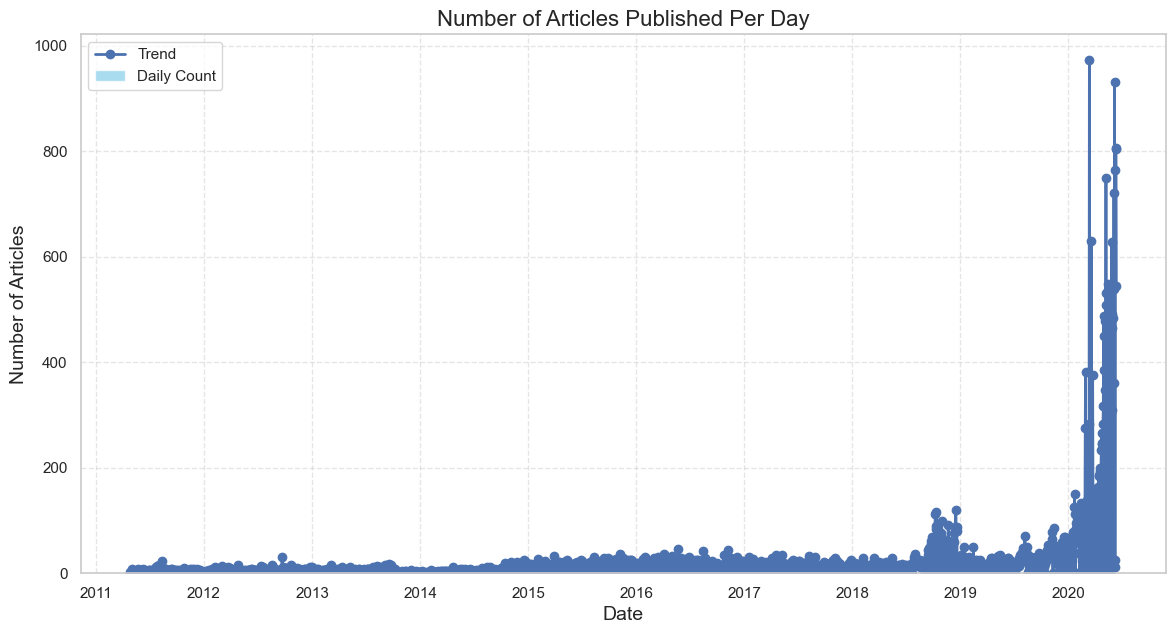

In [85]:
# Apply Seaborn styling for a more appealing visual
sns.set(style="whitegrid")

# Convert the 'date' column to datetime format, ensuring errors are handled gracefully
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce', infer_datetime_format=True)

# Drop any rows where 'date' conversion failed (i.e., where date became NaT)
data_frame = data_frame.dropna(subset=['date'])

# Count the number of articles published each day and sort them by date
articles_per_day = data_frame['date'].dt.date.value_counts().sort_index()

# Plotting the data using a bar plot with a line overlay
plt.figure(figsize=(14, 7))

# Create bars for daily article counts
plt.bar(articles_per_day.index, articles_per_day.values, color='skyblue', alpha=0.7, label='Daily Count')

# Overlay a line plot to show trends more smoothly
plt.plot(articles_per_day.index, articles_per_day.values, color='b', marker='o', linestyle='-', linewidth=2, label='Trend')

# Add title, labels, and grid
plt.title('Number of Articles Published Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [86]:
# Find out the specific days with the highest activity
top_days = articles_per_day.nlargest(10)
print(top_days)

date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
2020-05-07    749
2020-06-03    720
2020-03-19    629
2020-05-26    628
2020-05-13    549
Name: count, dtype: int64


### Sentiment Analysis

In [87]:
tickers = data_frame['stock'].unique().tolist()
print(f"No. of unique tickers: {len(tickers)} from 1407328 articles")
# Create a dictionary with 'key' tickers and 'value' No. of Shares in the above dataframe
portfolio = {t: data_frame[data_frame['stock'] == t].shape[0] for t in tickers}
portfolio

No. of unique tickers: 6204 from 1407328 articles


{'A': 10,
 'AA': 10,
 'AAC': 10,
 'AADR': 2,
 'AAL': 10,
 'AAMC': 10,
 'AAME': 10,
 'AAN': 10,
 'AAOI': 10,
 'AAON': 10,
 'AAP': 10,
 'AAPL': 10,
 'AAU': 10,
 'AAV': 10,
 'AAVL': 10,
 'AAWW': 10,
 'AAXJ': 8,
 'AB': 10,
 'ABAC': 10,
 'ABAX': 10,
 'ABB': 10,
 'ABBV': 10,
 'ABC': 10,
 'ABCB': 10,
 'ABCD': 10,
 'ABCO': 10,
 'ABCW': 10,
 'ABDC': 10,
 'ABEV': 10,
 'ABG': 10,
 'ABGB': 10,
 'ABIO': 10,
 'ABM': 10,
 'ABMD': 10,
 'ABR': 10,
 'ABTL': 10,
 'ABX': 10,
 'ABY': 10,
 'ACAD': 10,
 'ACAS': 10,
 'ACAT': 10,
 'ACC': 10,
 'ACCO': 10,
 'ACCU': 1,
 'ACE': 10,
 'ACET': 10,
 'ACFC': 10,
 'ACFN': 10,
 'ACG': 5,
 'ACGL': 10,
 'ACH': 10,
 'ACHC': 10,
 'ACHN': 10,
 'ACIW': 10,
 'ACLS': 10,
 'ACM': 10,
 'ACMP': 10,
 'ACN': 10,
 'ACNB': 10,
 'ACOR': 10,
 'ACP': 10,
 'ACPW': 10,
 'ACRE': 10,
 'ACRX': 10,
 'ACSF': 10,
 'ACST': 10,
 'ACT': 10,
 'ACTA': 10,
 'ACTG': 10,
 'ACTS': 10,
 'ACU': 10,
 'ACUR': 10,
 'ACWI': 9,
 'ACWV': 10,
 'ACWX': 5,
 'ACXM': 10,
 'ACY': 10,
 'ADAT': 10,
 'ADBE': 10,
 'ADC': 1

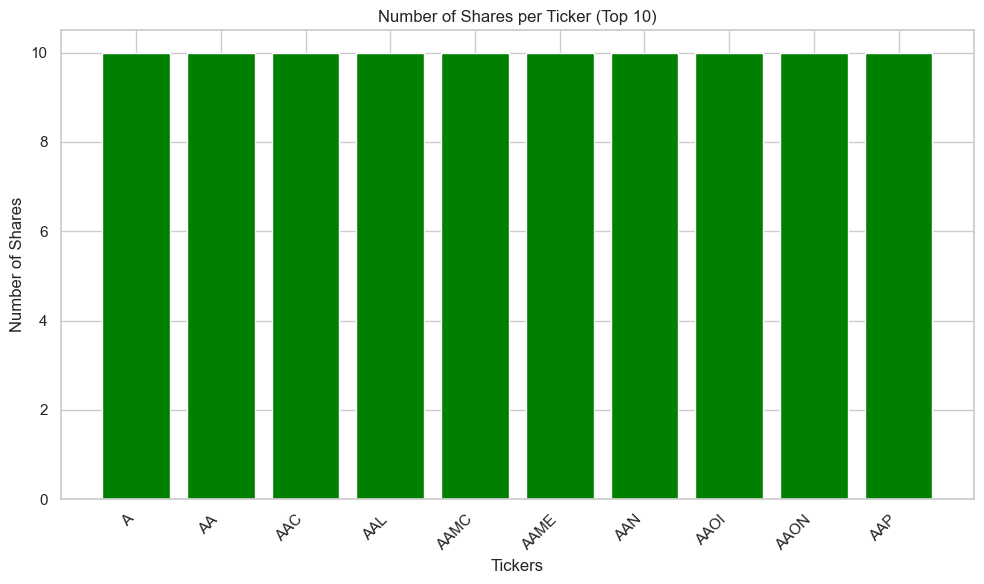

In [88]:
# Sort the portfolio by the number of shares for better visualization
sorted_portfolio = dict(sorted(portfolio.items(), key=lambda item: item[1], reverse=True))

# Extract tickers and share counts for plotting
tickers = list(sorted_portfolio.keys())
shares = list(sorted_portfolio.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(tickers[:10], shares[:10], color='green')
plt.xlabel('Tickers')
plt.ylabel('Number of Shares')
plt.title('Number of Shares per Ticker (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
sentiment_data=data_frame.copy()
sentiment_data.head()

,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [90]:
# Sentiment Analysis with Vader
# NLTK vader for sentiment analysis
import nltk
# nltk.downloader.download('vander_lexicon')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()


# Iterate through the headlines and get the polarity scores using vader
scores = sentiment_data['headline'].apply(vader.polarity_scores).tolist()




[nltk_data] Downloading package vader_lexicon to C:\Users\Surafel
[nltk_data]     Destaw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:

# Convert the 'scores' list of dicts into a DataFrame
scores_sentiment_data = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = sentiment_data.join(scores_sentiment_data, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date, errors='coerce').dt.date

# Categorize the sentiment scores
parsed_and_scored_news['sentiment_category'] = pd.cut(parsed_and_scored_news['compound'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
parsed_and_scored_news.head()

,headline,url,publisher,date,stock,headline_length,neg,neu,pos,compound,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,0.0,0.833,0.167,0.296,Neutral


In [92]:
parsed_and_scored_news['sentiment_category'].value_counts()

sentiment_category
Neutral          1210
Negative          384
Positive          207
Very Negative      36
Name: count, dtype: int64

In [93]:
# Select numeric columns for the groupby operation
num_columns = ['neg', 'neu', 'pos', 'compound']

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['stock', 'date'])[num_columns].mean()

mean_scores.head(30)

neg       neu       pos  compound
stock date                                              
A     2020-05-22  0.043143  0.895000  0.061857   0.04800
      2020-05-26  0.000000  1.000000  0.000000   0.00000
      2020-06-03  0.000000  1.000000  0.000000   0.00000
      2020-06-05  0.000000  1.000000  0.000000   0.00000
AA    2020-05-18  0.000000  0.843000  0.157000   0.07720
      2020-05-26  0.000000  0.843000  0.157000   0.07720
      2020-05-27  0.000000  0.921500  0.078500   0.03860
      2020-06-03  0.255000  0.745000  0.000000  -0.34000
      2020-06-04  0.000000  1.000000  0.000000   0.00000
      2020-06-05  0.000000  1.000000  0.000000   0.00000
      2020-06-08  0.000000  0.881500  0.118500   0.21075
      2020-06-09  0.000000  1.000000  0.000000   0.00000
AAC   2019-08-30  0.079500  0.835250  0.085250   0.06570
      2019-09-03  0.078000  0.809500  0.112500   0.36065
      2019-10-10  0.000000  1.000000  0.000000   0.00000
      2019-10-11  0.000000  0.526000  0.474000   0.20230
      2019-10-15  0.000000  0.694000  0.306000   0.29600
      2019-10-25  0.054000  0.743000  0.203000   0.65970
AADR  2013-03-05  0.000000  1.000000  0.000000   0.00000
      2013-09-06  0.096000  0.764000  0.140000   0.17790
AAL   2020-06-08  0.000000  0.722000  0.278000   0.40190
      2020-06-09  0.000000  0.816333  0.183667   0.39560
      2020-06-10  0.000000  0.963833  0.036167   0.09290
AAMC  2019-02-27  0.375000  0.625000  0.000000  -0.20230
      2019-03-25  0.000000  0.708000  0.292000   0.51060
      2019-03-26  0.000000  0.775000  0.225000   0.44040
      2019-05-08  0.000000  0.738000  0.262000   0.49390
      2019-05-30  0.000000  1.000000  0.000000   0.00000
      2019-08-07  0.000000  1.000000  0.000000   0.00000
      2019-11-06  0.254000  0.746000  0.000000  -0.58590

In [94]:
# Print the stock and date at which max and min sentiment score
print("   Maximum mean score value stock and date")
print(mean_scores['compound'].idxmax())
print()
print("   Minimum mean score value stock and date")
print(mean_scores['compound'].idxmin())

   Maximum mean score value stock and date
('AHL', datetime.date(2018, 8, 28))

   Minimum mean score value stock and date
('ABX', datetime.date(2018, 12, 6))


## Topic Modeling

### Text Preparation

In [97]:
# Punctuation removal
import string

modeling_data=data_frame.copy()

def rem_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: rem_punct(x))

# lowercasing text
modeling_data['headline'] = modeling_data['headline'].str.lower()

# tokenization
modeling_data['headline'] = modeling_data['headline'].str.split()

Stop word removal Stopwords are commonly used words that are removed since they add no value to the analysis like ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", ...]

In [98]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]
    return text

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to C:\Users\Surafel
[nltk_data]     Destaw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


#### Lemmatization

This is an algorithmic process followed to convert the word to its root form while also keeping its meaning intact

In [99]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lemma = WordNetLemmatizer()

def word_lemmatizer(text):
    text = [word_lemma.lemmatize(word) for word in text]
    return text

modeling_data['headline'] = modeling_data['headline'].apply(lambda x: word_lemmatizer(x))

[nltk_data] Downloading package wordnet to C:\Users\Surafel
[nltk_data]     Destaw\AppData\Roaming\nltk_data...


#### Model Preparation

After complete model preparation we will obtain the main topics for each of the top 3 Publishers in the latest year

In [100]:
# print the name of top 10 publishers
publishers = top_publishers.index.tolist()
publishers

['Paul Quintaro',
 'Lisa Levin',
 'Benzinga Newsdesk',
 'Charles Gross',
 'Monica Gerson',
 'Eddie Staley',
 'Hal Lindon',
 'ETF Professor',
 'Juan Lopez',
 'Benzinga Staff',
 'Vick Meyer',
 'webmaster',
 'Benzinga_Newsdesk',
 'Zacks',
 'Jayson Derrick',
 'Allie Wickman',
 'Shanthi Rexaline',
 'Craig Jones',
 'Wayne Duggan',
 'Nelson Hem']

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure 'date' column is in datetime format
modeling_data['date'] = pd.to_datetime(modeling_data['date'])

# Filter the data for the latest year's second semester (July to December)
latest_year = modeling_data['date'].dt.year.max()
latest_year_data = modeling_data[
    (modeling_data['date'].dt.year == latest_year)]
latest_year_data.head()

# Function to summarize topics
def summarize_topic(words):
    # This is a simple example; you might use more complex logic to generate summaries
    if 'stock' in words:
        return "Stock Market Trends"
    elif 'earnings' in words:
        return "Earnings Reports"
    elif 'acquisition' in words:
        return "Mergers and Acquisitions"
    else:
        return "General Financial News"

# Iterate over the top  publishers
for publisher in publishers[:3]:
  print(f"============================================{publisher}===============================================")
  publisher_headlines = latest_year_data[latest_year_data['publisher'] == publisher]
  # Iterate over each row in the DataFrame, not by index
  for _, row in publisher_headlines.iterrows():
    headline = row['headline']  # Access the list of words directly
    vect1 = TfidfVectorizer(stop_words=stop_words, max_features=1000)
    # Join the words back into a string for TfidfVectorizer
    vect_text1 = vect1.fit_transform([' '.join(headline)])
    lda_model = LatentDirichletAllocation(n_components=1, learning_method='online', random_state=42, max_iter=1)
    lda_t = lda_model.fit(vect_text1)

    # Summarize each topic
    vocab = vect1.get_feature_names_out()
    for k, comp in enumerate(lda_model.components_):
        componentTerms = zip(vocab, comp)
        sortedTerms = sorted(componentTerms, key=lambda x: x[1], reverse=True)[:10]
        topic_words = [t[0] for t in sortedTerms]
        summary = summarize_topic(topic_words)
        print(f"Topic {k}: {summary}")
        print("Top words:", ", ".join(topic_words))
        print("\n")

============================================Paul Quintaro===============================================
============================================Lisa Levin===============================================
Topic 0: General Financial News
Top words: 71, biggest, mover, friday


Topic 0: Stock Market Trends
Top words: session, stock, 46, friday, moving, midday


Topic 0: General Financial News
Top words: price, target, 10, biggest, friday, change


Topic 0: General Financial News
Top words: 108, biggest, yesterday, mover


Topic 0: General Financial News
Top words: 96, biggest, mover, friday


Topic 0: Stock Market Trends
Top words: session, stock, 70, friday, moving, midday


Topic 0: General Financial News
Top words: 144, biggest, mover, friday


Topic 0: Stock Market Trends
Top words: thursday, 52week, hit, stock, low


Topic 0: Stock Market Trends
Top words: stock, tuesday, 44, midday, session, moving


Topic 0: Stock Market Trends
Top words: stock, tuesday, 28, moving, session, pre

## Time Series Analysis

In [113]:
ts_data=data_frame.copy()


In [114]:
# Count headlines per day
daily_headlines = ts_data.groupby('date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

time_series_data.head(10)

,Headlines_Count
date,
2011-04-27 21:01:48-04:00,1
2011-04-28 13:49:29-04:00,1
2011-04-28 15:00:36-04:00,1
2011-04-29 13:47:06-04:00,1
2011-04-29 16:11:05-04:00,1
2011-04-30 16:52:35-04:00,1
2011-05-01 18:18:28-04:00,1
2011-05-02 02:17:31-04:00,1
2011-05-02 03:24:46-04:00,3


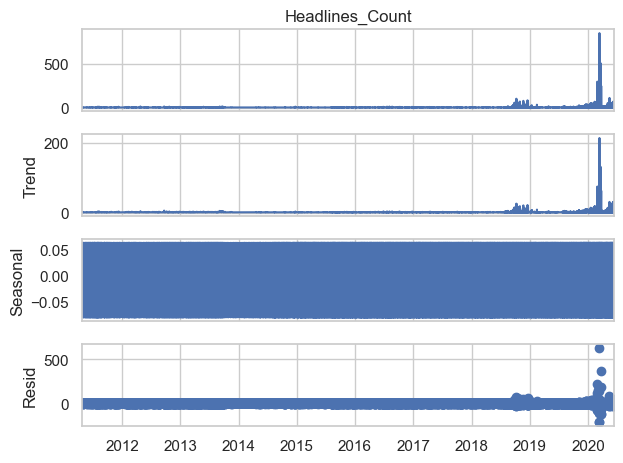

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=4)

# plotting the components
decomposition.plot()
plt.tight_layout()
plt.show()